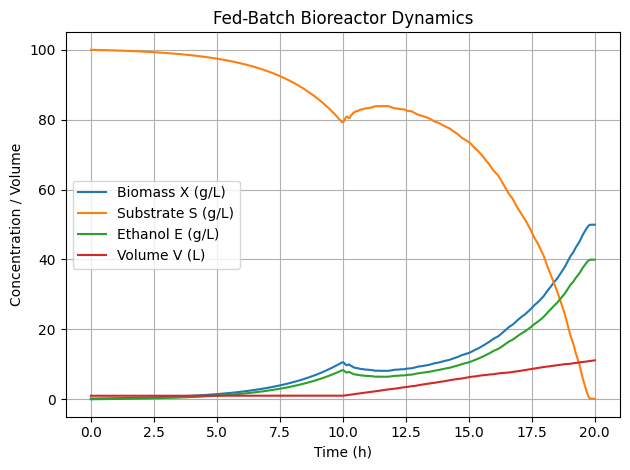

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# === Parameters ===
Y_xs = 0.5         # Biomass yield on substrate (g/g)
Y_ep = 0.4         # Ethanol yield on substrate (g/g)
q_s_max = 2.0      # Max specific glucose uptake (1/h)
K_s = 0.5          # Monod constant (g/L)
mu_max = 0.4       # Max specific growth rate (1/h)
k_L = 0.5          # Oxygen transfer rate (1/h)
q_o = 0.01         # Specific oxygen uptake (g/g.h)
S_in = 100         # Substrate concentration in feed (g/L)
V_max = 20         # Max reactor volume (L)

# === Feed profile ===
def feed_rate(t):
    if t<=10:
        return 0
    else:
        return np.random.uniform(0.5, 1.5)  # Random feed rate between 0.5 and 1.5 L/h

# === Differential Equations ===
def bioreactor_model(t, y):
    X, S, E, V, DOT = y
    F = feed_rate(t)

    # Avoid division by zero
    if V <= 0:
        return [0, 0, 0, 0, 0]

    # Monod kinetics
    mu = mu_max * S / (K_s + S)
    q_s = mu / Y_xs
    q_ep = Y_ep * q_s

    # Mass balances
    dXdt = mu * X - (F / V) * X
    dSdt = (F / V) * (S_in - S) - q_s * X
    dEdt = q_ep * X - (F / V) * E
    dVdt = F
    dDOTdt = k_L * (100 - DOT) - 14000 * X * q_o

    return [dXdt, dSdt, dEdt, dVdt, dDOTdt]

# === Initial Conditions ===
X0 = 0.2     # g/L
S0 = 100.0   # g/L
E0 = 0.0     # g/L
V0 = 1.0     # L
DOT0 = 100.0  # %

y0 = [X0, S0, E0, V0, DOT0]

# === Simulation ===
t_span = (0, 20)  # hours
t_eval = np.linspace(*t_span, 500)

sol = solve_ivp(bioreactor_model, t_span, y0, t_eval=t_eval, method='RK45')

# === Plotting ===
labels = ['Biomass X (g/L)', 'Substrate S (g/L)', 'Ethanol E (g/L)', 'Volume V (L)', 'DOT (%)']
for i in range(4):
    plt.plot(sol.t, sol.y[i], label=labels[i])
plt.xlabel("Time (h)")
plt.ylabel("Concentration / Volume")
plt.title("Fed-Batch Bioreactor Dynamics")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
